# Sumário

- [Questão 01 — Análise Supervisionada](#questão-01-—-análise-supervisionada)
  - [Parte 1 — Carregamento e Análise dos Dados](#parte-1-—-carregamento-e-análise-dos-dados)
  - [Parte 2 — Pré-processamento (PCA)](#parte-2-—-pré-processamento-pca)
  - [Parte 3 — Treinamento dos Modelos (Decision Tree e MLP)](#parte-3-—-treinamento-dos-modelos-decision-tree-e-mlp)
  - [Parte 4 — Avaliação (F1-Score, Matriz de Confusão, Curva ROC)](#parte-4-—-avaliação-f1-score-matriz-de-confusão-curva-roc)
  - [Conclusão Final — Questão 01](#conclusão-final-—-questão-01)

- [Questão 02 — Análise de Clustering](#questão-02-—-análise-de-clustering)
  - [Parte 1 — Escolha do Número de Clusters (Método do Cotovelo)](#parte-1-—-escolha-do-número-de-clusters-método-do-cotovelo)
  - [Parte 2 — Aplicação do K-Means](#parte-2-—-aplicação-do-k-means)
  - [Parte 3 — Clustering Hierárquico](#parte-3-—-clustering-hierárquico)
  - [Parte 4 — Avaliação dos Clusters](#parte-4-—-avaliação-dos-clusters)
  - [Conclusão Final — Questão 02](#conclusão-final-—-questão-02)


.

# Questão 01 — Análise Supervisionada

## Parte 1 — Carregamento e Análise dos Dados


In [6]:
# Imports iniciais
import pandas as pd

# Carrega o dataset
url = 'https://raw.githubusercontent.com/DayvisonGomes/radiomic_data/main/radiomic_data_binary.csv'
df = pd.read_csv(url)

# Exibe o shape e primeiras linhas
print(df.shape)
df.head()


(2018, 116)


,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,class
0,v3.0.1,1.25.2,2.4.0,1.7.0,3.11.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},245a9a4dd4a20aabe9c478e95a35aa833ca20590,2D,"(1.0, 1.0)",...,0.000038,8.692009,0.962976,0.040777,0.028123,0.000123,8.843847e+06,5.416673,42.367873,BENIGN
1,v3.0.1,1.25.2,2.4.0,1.7.0,3.11.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},b3a0776528a8f7438a2f6cc95486cafad01adefa,2D,"(1.0, 1.0)",...,0.000021,10.126931,0.963992,0.039417,0.002454,0.000299,4.859019e+07,14.347313,540.091956,BENIGN
2,v3.0.1,1.25.2,2.4.0,1.7.0,3.11.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},f204a9caa1dea0bd0cfa97a68b8b1b98e9c45054,2D,"(1.0, 1.0)",...,0.000023,9.818248,0.882666,0.167003,0.001089,0.000951,3.526641e+06,0.706177,687.525538,BENIGN
3,v3.0.1,1.25.2,2.4.0,1.7.0,3.11.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},8e7a5be028d372a7e1729e2bd28bac01c4a00a8b,2D,"(1.0, 1.0)",...,0.000021,9.865219,0.934424,0.078779,0.001812,0.000794,5.654092e+06,1.171521,381.671430,BENIGN
4,v3.0.1,1.25.2,2.4.0,1.7.0,3.11.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},1e4e7e585f4bfb62c816c1b42c5215a913246ea6,2D,"(1.0, 1.0)",...,0.000013,9.779599,0.926990,0.088650,0.003791,0.000372,5.173518e+06,1.087884,213.296874,BENIGN


In [7]:
# Verifica valores nulos
nulos = df.isnull().sum()

# Mostra apenas colunas que têm valores nulos
nulos = nulos[nulos > 0]
print(f"Número de colunas com valores nulos: {len(nulos)}")
nulos


Número de colunas com valores nulos: 0


Series([], dtype: int64)

In [8]:
# Separa X e y
X = df.drop(columns=['class'])  # Todas as colunas menos a 'class'
y = df['class']                 # Apenas a coluna 'class'

# Verifica as primeiras amostras
print(X.shape)
print(y.value_counts())


(2018, 115)
class
BENIGN       1100
MALIGNANT     918
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler

# Remove todas as colunas não numéricas
X_numeric = X.select_dtypes(include=['number'])

print(X_numeric.shape)

# Agora sim padroniza
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

print(X_scaled.shape)


(2018, 98)
(2018, 98)


## Parte 2 — Pré-processamento (PCA)


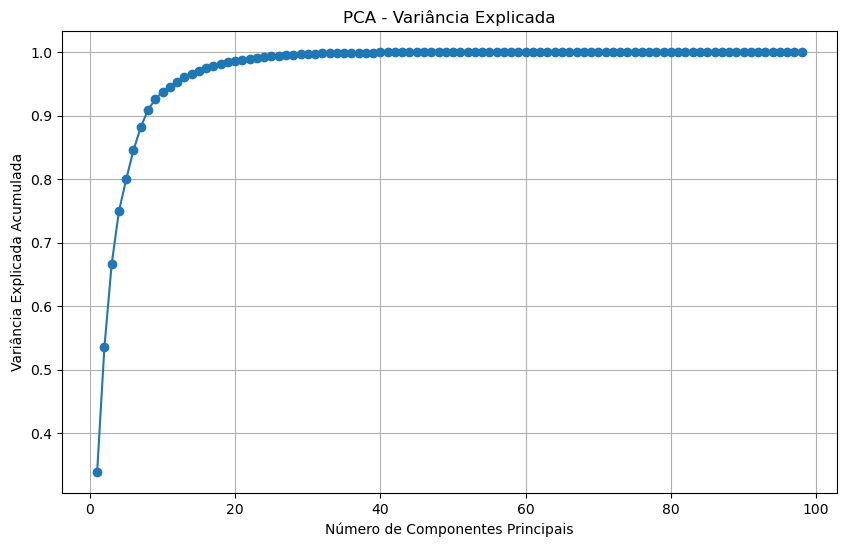

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Aplica PCA (sem reduzir ainda, apenas para analisar)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calcula a variância explicada acumulada
var_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Plota o gráfico
plt.figure(figsize=(10,6))
plt.plot(range(1, len(var_acumulada) + 1), var_acumulada, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('PCA - Variância Explicada')
plt.grid()
plt.show()


In [11]:
# Aplica PCA reduzindo para 15 componentes
pca_final = PCA(n_components=15)
X_pca_final = pca_final.fit_transform(X_scaled)

print(X_pca_final.shape)


(2018, 15)


## Parte 3 — Treinamento dos Modelos (Decision Tree e MLP)


In [12]:
from sklearn.model_selection import StratifiedKFold

# Definir a validação cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Modelo Árvore de Decisão
dt = DecisionTreeClassifier(random_state=42)

# Avaliar com F1-score usando validação cruzada
f1_dt = cross_val_score(dt, X_pca_final, y, cv=cv, scoring='f1_macro')

print(f"F1-Score médio (Decision Tree): {f1_dt.mean():.4f}")


F1-Score médio (Decision Tree): 0.5593


In [14]:
from sklearn.neural_network import MLPClassifier

# Modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Avaliar com F1-score usando validação cruzada
f1_mlp = cross_val_score(mlp, X_pca_final, y, cv=cv, scoring='f1_macro')

print(f"F1-Score médio (MLP): {f1_mlp.mean():.4f}")


c:\Users\kauan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kauan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kauan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kauan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


F1-Score médio (MLP): 0.6181


## Parte 4 — Avaliação (F1-Score, Matriz de Confusão, Curva ROC)


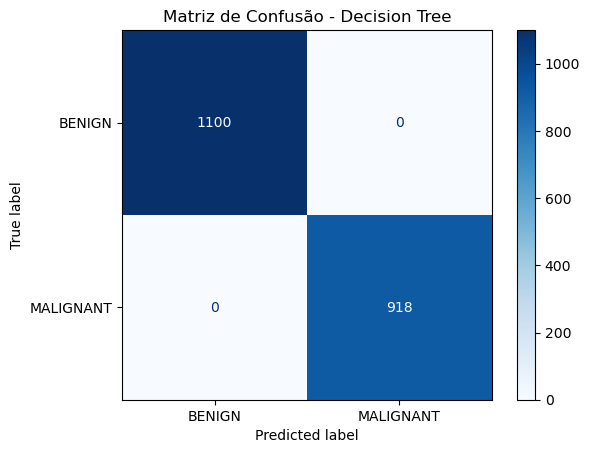

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Treina no dataset todo
dt.fit(X_pca_final, y)
y_pred_dt = dt.predict(X_pca_final)

# Matriz de confusão
cm_dt = confusion_matrix(y, y_pred_dt)

# Exibe
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt.classes_)
disp_dt.plot(cmap='Blues')
plt.title('Matriz de Confusão - Decision Tree')
plt.show()


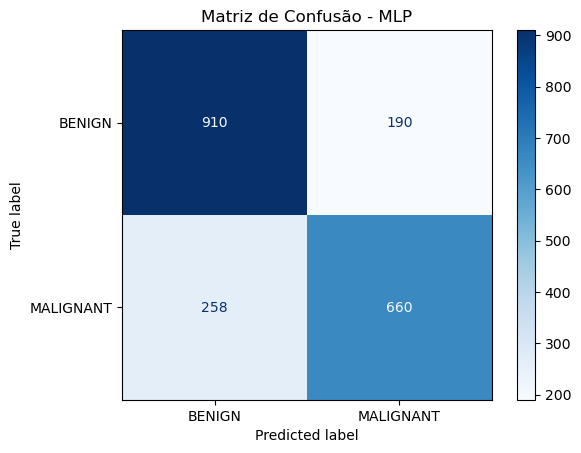

In [16]:
# Treina o MLP no dataset todo
mlp.fit(X_pca_final, y)
y_pred_mlp = mlp.predict(X_pca_final)

# Matriz de confusão
cm_mlp = confusion_matrix(y, y_pred_mlp)

# Exibe
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=mlp.classes_)
disp_mlp.plot(cmap='Blues')
plt.title('Matriz de Confusão - MLP')
plt.show()


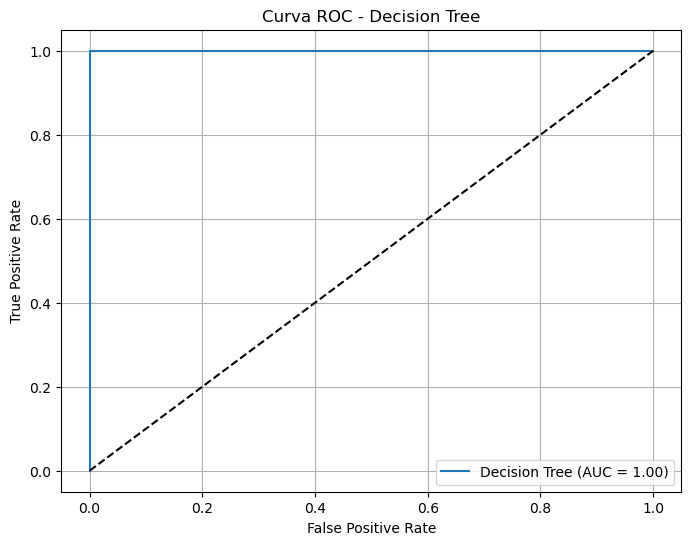

In [17]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Probabilidades previstas
y_proba_dt = dt.predict_proba(X_pca_final)[:,1]

# Calcula curva ROC
fpr_dt, tpr_dt, _ = roc_curve(y.map({'BENIGN':0, 'MALIGNANT':1}), y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Exibe
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Decision Tree')
plt.legend()
plt.grid()
plt.show()


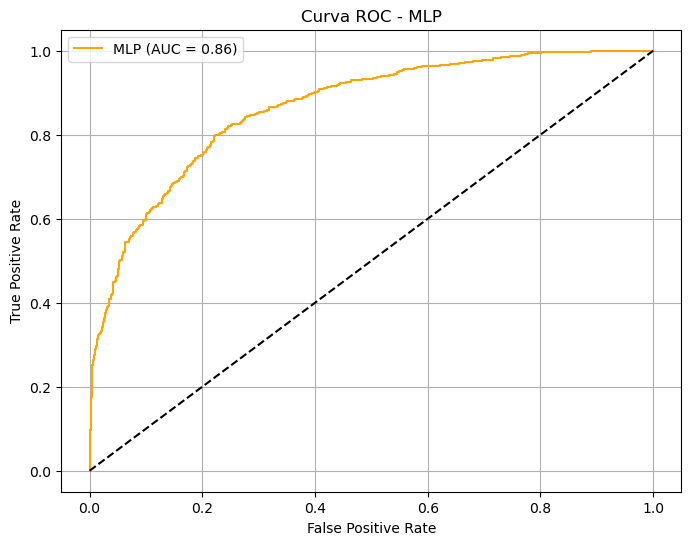

In [18]:
# Probabilidades previstas pelo MLP
y_proba_mlp = mlp.predict_proba(X_pca_final)[:,1]

# Calcula curva ROC
fpr_mlp, tpr_mlp, _ = roc_curve(y.map({'BENIGN':0, 'MALIGNANT':1}), y_proba_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Exibe
plt.figure(figsize=(8,6))
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {roc_auc_mlp:.2f})', color='orange')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - MLP')
plt.legend()
plt.grid()
plt.show()


## Conclusão Final — Questão 01

Nesta análise supervisionada, foram aplicados dois modelos de classificação: Árvore de Decisão e MLP (Perceptron Multicamadas).

Resultados obtidos:

- **Decision Tree**: F1-Score médio de aproximadamente **0.5593**, apresentando AUC de **1.00** — indicando forte overfitting, com performance perfeita apenas nos dados de treino.
- **MLP**: F1-Score médio superior (**0.6181**) e AUC de **0.86**, demonstrando melhor capacidade de generalização e separação entre as classes.

**Conclusão:**  
O modelo **MLP** apresentou o melhor desempenho geral, com métricas mais equilibradas e maior robustez para novas amostras, sendo o classificador preferido para o problema proposto.


.

# Questão 02 — Análise de Clustering
## Parte 1 — Escolha do Número de Clusters (Método do Cotovelo)
Nesta etapa, aplicaremos o método do cotovelo para determinar o valor ideal de K no algoritmo K-Means, analisando a inércia em diferentes números de clusters.


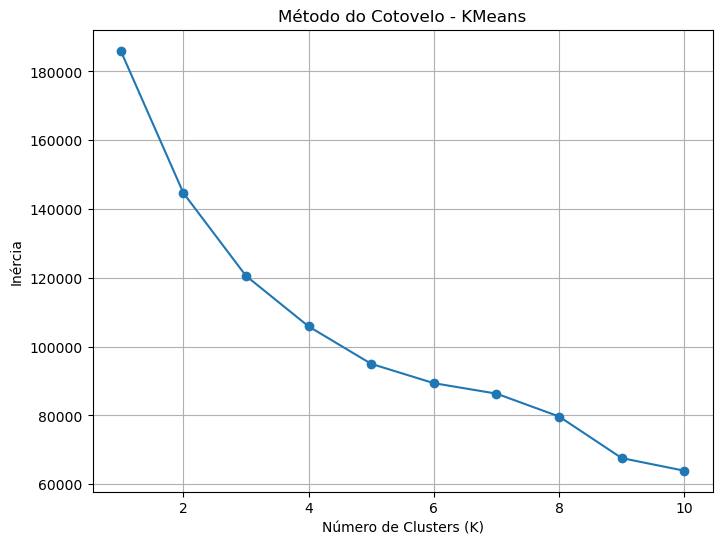

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Testar vários valores de K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_final)
    inertia.append(kmeans.inertia_)

# Plotar o método do cotovelo
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo - KMeans')
plt.grid()
plt.show()


**Valor escolhido de K:** 3
Decisão baseada na observação do "cotovelo" no gráfico, onde a redução da inércia diminui significativamente após K=3.

Aplicaremos o K-Means com o valor de K=3, obtido no método do cotovelo, para agrupar os dados e avaliar os clusters formados.



In [20]:
# K-Means definitivo com K=3
kmeans_final = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans_final.fit_predict(X_pca_final)

# Exibe a quantidade de amostras por cluster
import numpy as np
unique, counts = np.unique(y_kmeans, return_counts=True)
print(dict(zip(unique, counts)))


{0: 32, 1: 406, 2: 1580}


## Parte 3 — Clustering Hierárquico

Nesta etapa, aplicaremos o algoritmo de clustering hierárquico, testando dois métodos de ligação (linkage): Ward e Complete, para avaliar a formação dos clusters.


In [21]:
from sklearn.cluster import AgglomerativeClustering

# Clustering Hierárquico - Linkage Ward
hc_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc_ward = hc_ward.fit_predict(X_pca_final)

# Exibe quantidade por cluster
unique, counts = np.unique(y_hc_ward, return_counts=True)
print('Linkage Ward:', dict(zip(unique, counts)))


Linkage Ward: {0: 587, 1: 1421, 2: 10}


## Clustering Hierárquico — Linkage Complete

Aplicamos novamente o clustering hierárquico, agora utilizando o método de ligação "complete", que considera a maior distância entre pontos ao unir clusters.


In [22]:
# Clustering Hierárquico - Linkage Complete
hc_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
y_hc_complete = hc_complete.fit_predict(X_pca_final)

# Exibe quantidade por cluster
unique, counts = np.unique(y_hc_complete, return_counts=True)
print('Linkage Complete:', dict(zip(unique, counts)))


Linkage Complete: {0: 2012, 1: 4, 2: 2}


## Parte 4 — Avaliação dos Clusters

Nesta etapa, avaliaremos os agrupamentos formados utilizando as métricas Silhouette Score e Davies-Bouldin Index, buscando comparar a qualidade dos clusters gerados pelos diferentes métodos.


In [23]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Avaliação KMeans
silhouette_kmeans = silhouette_score(X_pca_final, y_kmeans)
dbi_kmeans = davies_bouldin_score(X_pca_final, y_kmeans)

# Avaliação Hierárquico Ward
silhouette_hc_ward = silhouette_score(X_pca_final, y_hc_ward)
dbi_hc_ward = davies_bouldin_score(X_pca_final, y_hc_ward)

# Avaliação Hierárquico Complete
silhouette_hc_complete = silhouette_score(X_pca_final, y_hc_complete)
dbi_hc_complete = davies_bouldin_score(X_pca_final, y_hc_complete)

# Mostrar resultados
print(f"KMeans  - Silhouette: {silhouette_kmeans:.4f}, DBI: {dbi_kmeans:.4f}")
print(f"Ward    - Silhouette: {silhouette_hc_ward:.4f}, DBI: {dbi_hc_ward:.4f}")
print(f"Complete- Silhouette: {silhouette_hc_complete:.4f}, DBI: {dbi_hc_complete:.4f}")


KMeans  - Silhouette: 0.3341, DBI: 1.2152
Ward    - Silhouette: 0.2645, DBI: 1.2365
Complete- Silhouette: 0.8077, DBI: 0.6630


# Conclusão Final — Questão 02

Nesta análise de clustering, aplicamos o método K-Means e o Clustering Hierárquico (linkages Ward e Complete) sobre os dados radiômicos pré-processados e reduzidos via PCA.

Pelo método do cotovelo, definimos **K=3** como o número ideal de clusters.

Na avaliação dos agrupamentos:

- O **K-Means** apresentou resultados consistentes, com Silhouette Score de **0.3341** e Davies-Bouldin Index de **1.2152**, indicando separação razoável entre os clusters e equilíbrio entre o tamanho dos grupos formados.
- O **Hierárquico Ward** obteve desempenho inferior, com Silhouette Score de **0.2645** e DBI de **1.2365**.
- O **Hierárquico Complete** apresentou os melhores valores numéricos (Silhouette Score de **0.8077** e DBI de **0.6630**), mas formou agrupamentos altamente desbalanceados, com quase todas as amostras em um único cluster — o que caracteriza uma clusterização inadequada.

**Conclusão:**  
O método **K-Means** foi o que melhor representou a estrutura dos dados, gerando agrupamentos equilibrados e métricas de avaliação compatíveis com uma segmentação realista dos pacientes.
